# **Ayush Kumar**








# **1- Prediction Using Supervised ML: Linear Regression **

**Simple** **Linear** **Regression**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [ ]:
# importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Reading the data from csv file
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
df.shape

(25, 2)

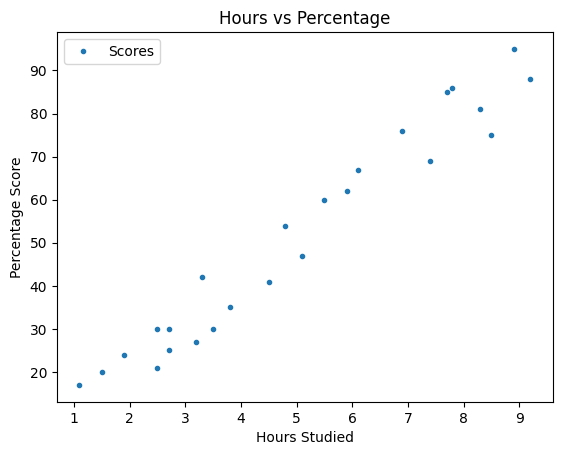

In [ ]:
# plotting of distribution of scores
df.plot(x = "Hours", y = "Scores", style= "." )
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**From the graph we can see that there is a linear relationship between the Hours Studied and Percentage Score.**

In [ ]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


Since, The Variables are Highly Correleated.

##Data Preparation

In [27]:
#defining target variable x and y
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [34]:
# Model Selection
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, random_state = 0)

## Training the Model

In [35]:
# Imprting the Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

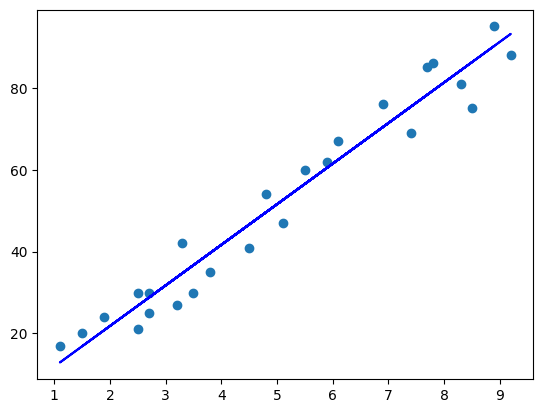

In [36]:
# Plotting the Regression Line
line = model.intercept_+x*model.coef_
plt.scatter(x,y)
plt.plot(x, line,color='b');
plt.show()

## Making Predictions

In [37]:
# Predicting the Test Data
y_pred = model.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [38]:
# Comparing Actual vs Predicted Value
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df1)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


In [40]:
# Testing with our own data
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


## Evaluation Of Model

In [41]:
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',
      metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


Hence, the predicted score of student who studies 9.25 hrs/day is about 93.69%